# Cell Type Annotation

In [2]:
import scanpy as sc
import matplotlib.pyplot as plt
import os
import seaborn as sns
import json   

plt.rcParams['figure.figsize'] = (9, 9)

In [3]:
# load data
adata = sc.read("/home/h/hollenberg/MaPra/adata_radiation_processed.h5ad")

/home/h/hollenberg/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


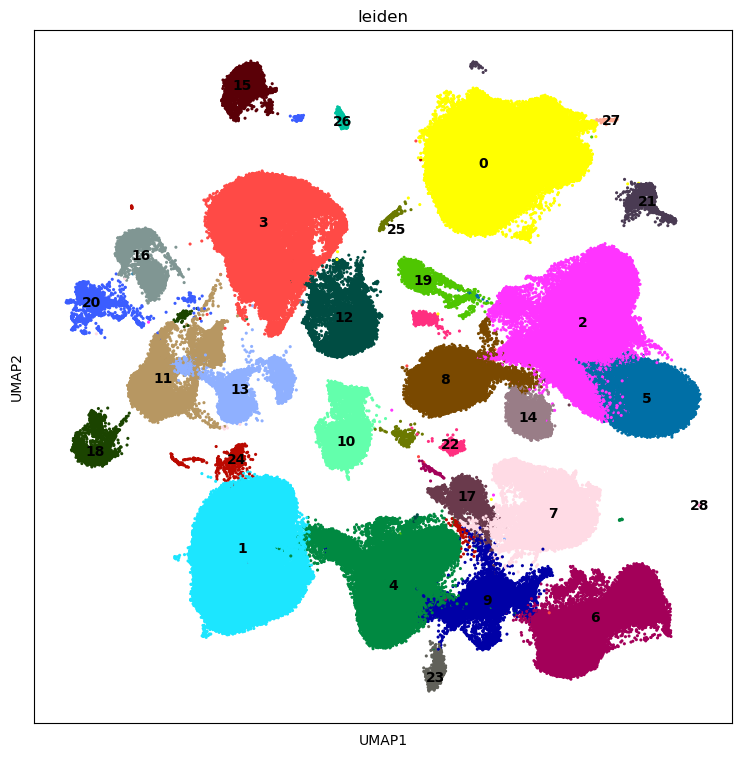

In [5]:
sc.tl.leiden(adata, resolution=0.3)
sc.pl.umap(adata, color='leiden', size=20, legend_loc='on data')

In [46]:
with open('marker_genes.json') as json_file:
    marker_genes = json.load(json_file)

In [47]:
# Create a new hashmap to store the missing genes
missing_genes = {}
updated_marker_genes = marker_genes.copy()

# Check if the genes from the marker_genes hashmap are present in andata.var_names
for cell_type, genes in marker_genes.items():
    for gene in genes:
        if gene not in adata.var_names:
            if gene == 'Clec4c':
                updated_marker_genes[cell_type].append('Clec4b1')
                updated_marker_genes[cell_type].remove('Clec4c')
                print(f"Gene 'Clec4c' for cell type '{cell_type}' has been replaced with 'Clec4b1'.")
            elif gene == 'Pecam4':
                updated_marker_genes[cell_type].append('Pecam1')
                updated_marker_genes[cell_type].remove('Pecam4')
                print(f"Gene 'Pecam4' for cell type '{cell_type}' has been replaced with 'Pecam1'.")

for cell_type, genes in updated_marker_genes.items():
    updated_marker_genes[cell_type] = list(set(genes))

Gene 'Clec4c' for cell type 'Dendritic cells pDC' has been replaced with 'Clec4b1'.
Gene 'Pecam4' for cell type 'Endothelial' has been replaced with 'Pecam1'.


/home/h/hollenberg/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


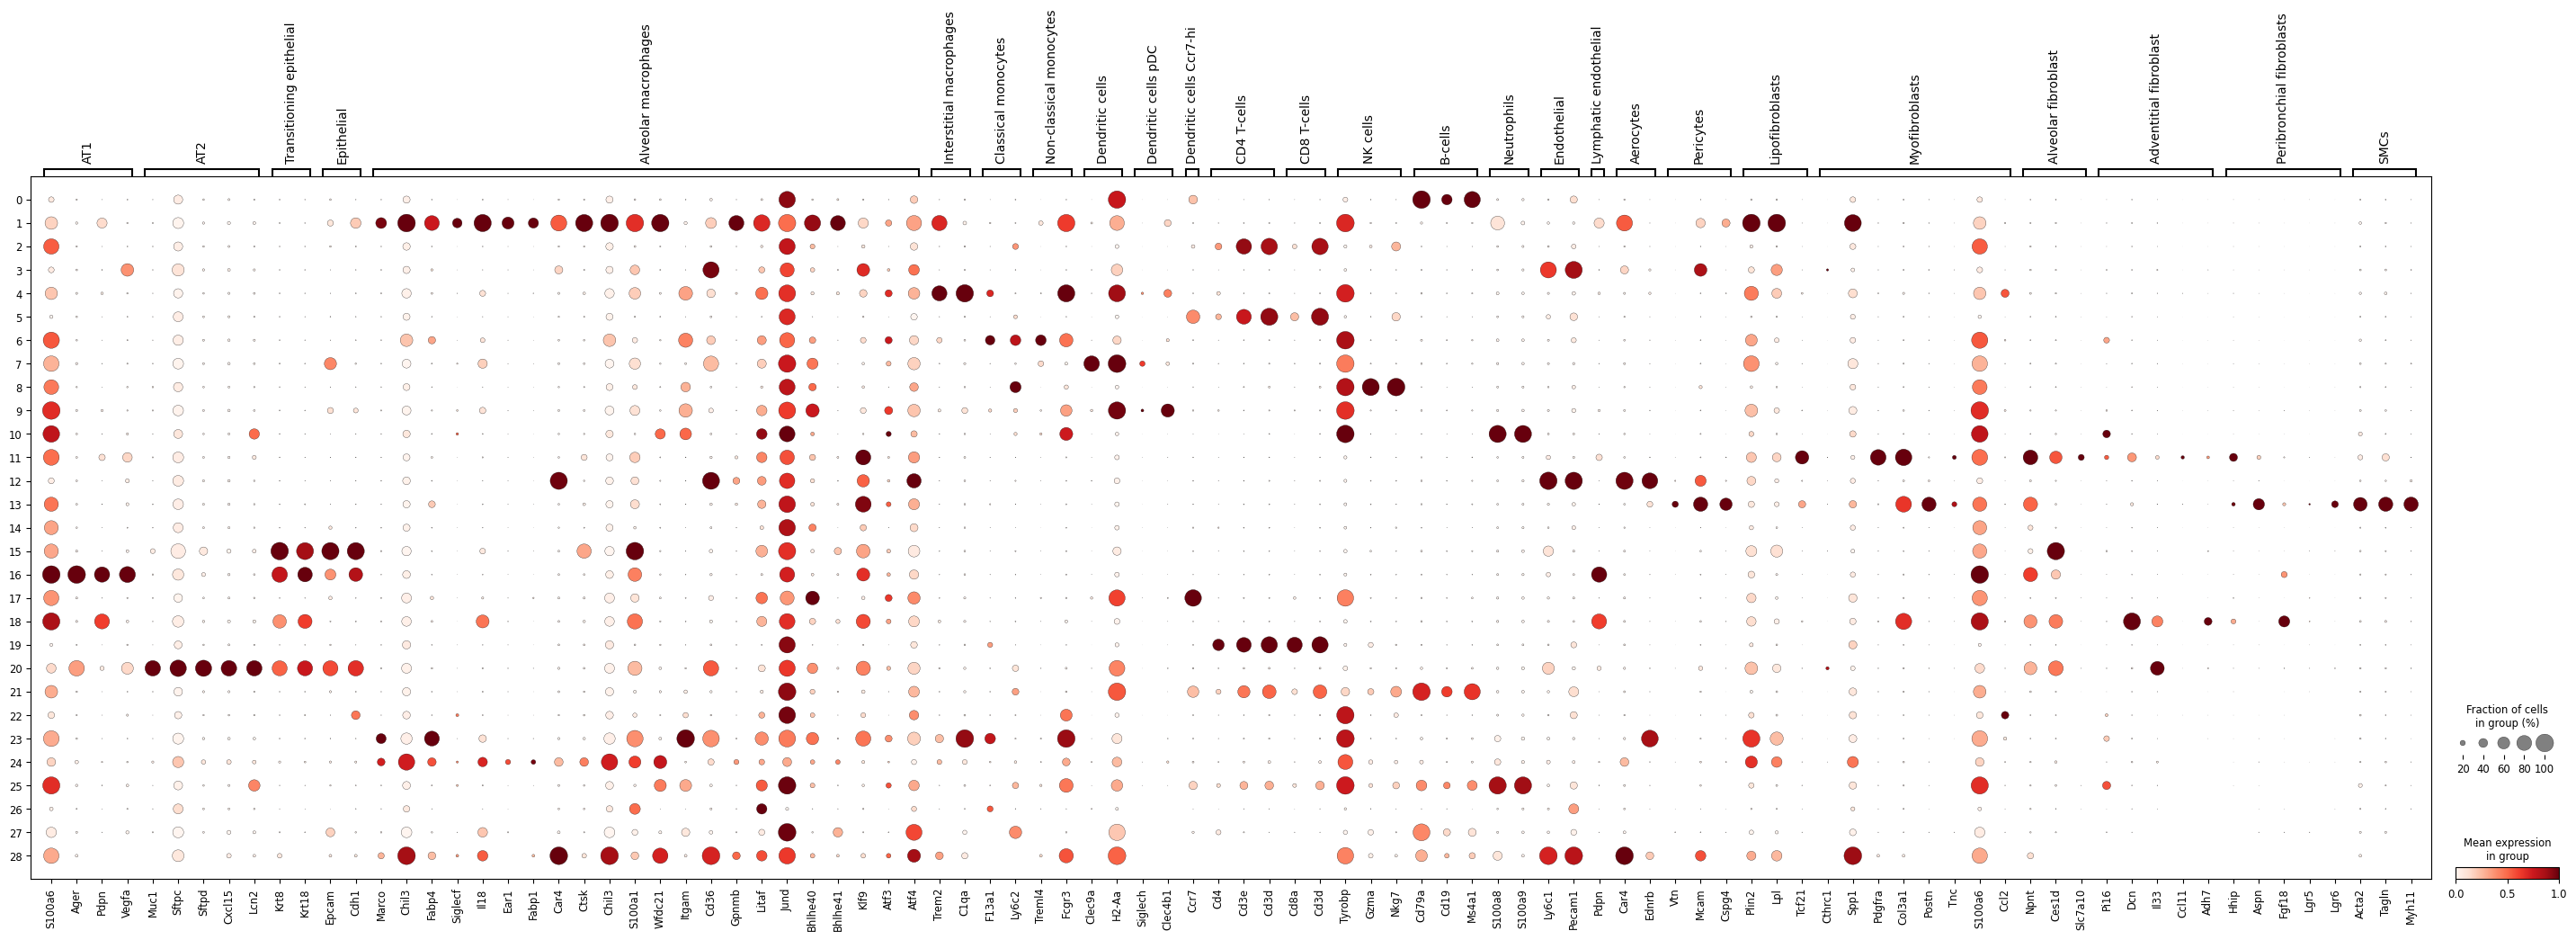

In [49]:
sc.pl.dotplot(
    adata,
    groupby="leiden",
    var_names=marker_genes,
    standard_scale="var",
    save = "markergenes.png"
) 
#plt.savefig("Dotplot.png", dpi=300, bbox_inches="tight")

In [ ]:
# to big for github 
# UMAPS colored by expression of marker genes 
for ct in marker_genes.keys():
    print(f"{ct.upper()}:")  # print cell subtype name
    sc.pl.umap(
        adata,
        color=updated_marker_genes[ct],
        vmin=0,
        vmax="p99",
        sort_order=False,
        frameon=False,
        cmap="Reds",
    )

## Annotation

Based on the dotplot and UMAPs with the marker genes, all clusters except 14 and 26 can be categorized to a cell type 
-> Calculate the marker genes for the Cluster 14 and 26

In [ ]:
sc.tl.rank_genes_groups(adata, groupby='leiden', method='wilcoxon')

In [45]:
marker_genes_cluster_14 = adata.uns['rank_genes_groups']['names']['14'][:10]
marker_genes_cluster_26 = adata.uns['rank_genes_groups']['names']['26'][:10]

print("Top 10 Marker-Gene, Cluster 14:", marker_genes_cluster_14)
print("Top 10 Marker-Gene, Cluster 26:", marker_genes_cluster_26)

Top 10 Marker-Gene für Cluster 14: ['Gata3' 'Il7r' 'Rplp1' 'Il1rl1' 'Emb' 'Id2' 'Ltb' 'Cxcr6' 'Samsn1'
 'Il2ra']
Top 10 Marker-Gene für Cluster 26: ['Nrgn' 'Ywhah' 'Ctla2a' 'Gng11' 'Pf4' 'Clec1b' 'Cd9' '1810058I24Rik'
 'Tsc22d1' 'Tmsb4x']


<b>Research:</b> <br>
<br>
Cluster 14 -> CD4 T-cells
- Gata3: Gata3 is a transcription factor that plays an important role in T helper cells (CD4+ T cells) and regulates their development and function.
- Il7r: Interleukin-7 receptor (Il7r) is a key marker for naive T cells and plays a role in T cell differentiation and proliferation.
- Il1rl1: This gene encodes the interleukin-33 receptor (IL-33R), which is expressed in regulatory T cells and certain effector T cells.
- Id2: Id2 is an inhibitor of DNA-binding transcription factors and plays a role in T cell differentiation.
- Cxcr6: This gene encodes the chemokine receptor CXCR6, which is expressed on various T cell subsets, including some T memory cells.
- Il2ra: Interleukin-2 receptor alpha (IL-2RA) is expressed on activated T cells and is an important marker for activating T cells.

Cluster 26 -> Monocytes
- Ctla2a: Ctla2a, or Cytotoxic T-Lymphocyte-Associated Protein 2 Alpha, is expressed in monocytes, which are vital white blood cells involved in the immune response.
- Gng11: Gng11 encodes G protein subunit gamma 11 and is expressed in monocytes, contributing to intracellular signal transduction pathways during immune reactions.
- Tmsb4x: Thymosin Beta-4 X-Linked (Tmsb4x) is expressed in monocytes and regulates actin polymerization, aiding in cell movement and phagocytic activity during immune responses and tissue repair.

In [50]:
annotation = {
    "0": "B-cells",
    "1": "Alveolar macrophages",
    "2": "CD4 T-cells",
    "3": "Endothelial",
    "4": "Interstitial Macrophage",
    "5": "T-cells",
    "6": "Monocytes", 
    "7": "Dendritic cells",
    "8": "NK cells",
    "9": "Dendritic cells pDC",  
    "10": "Neutrophils",
    "11": "Myofibroblasts",
    "12": "Endothelial",
    "13": "SMCS",
    "14": "CD4 T-cells",
    "15": "Epithelial",
    "16": "AT1",
    "17": "Dendritic cell CCR7",
    "18": "Adventitial fibroblast",
    "19": "T-cells",  
    "20": "AT2",
    "21": "B-cells",
    "22": "NK cells",
    "23": "Interstitial Macrophage",
    "24": "Alveolar macrophages",
    "25": "Neutrophils",
    "26": "Monocytes",
    "27": "B-cells",
    "28": "Endothelial"
}

In [52]:
adata.obs["annotation"] = adata.obs.leiden.map(annotation).astype("category")

/home/h/hollenberg/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


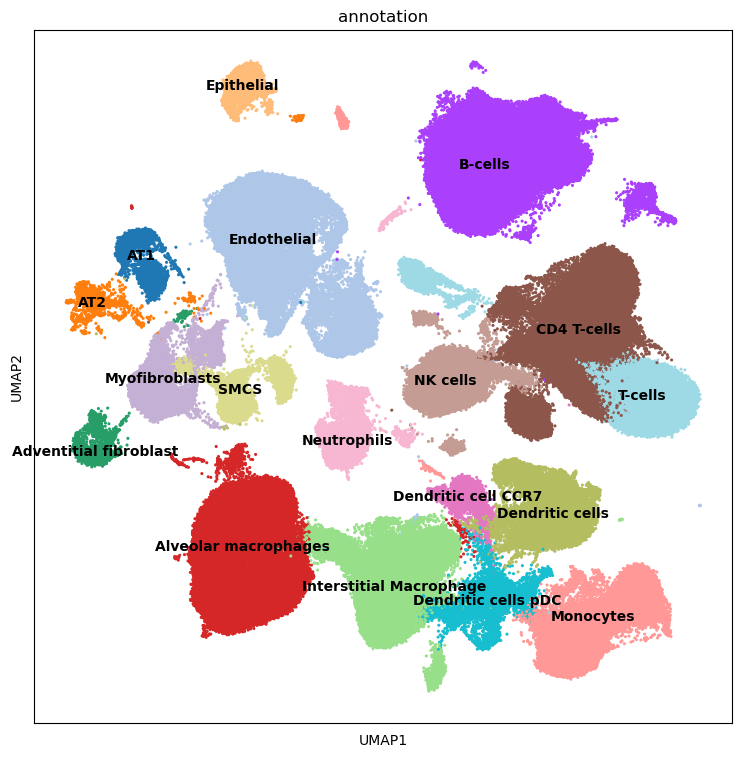

In [53]:
sc.pl.umap(adata, color="annotation", size = 20, legend_loc="on data")